In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
la = np.linalg

In [25]:
sentences = ["I like deep learning",
            "I like NLP",
            "I enjoy flying"]

In [36]:
unique_words_set=set()
for sent in sentences:
    words = sent.split()
    for word in words:
        unique_words_set.add(word)
unique_words_set

{'I', 'NLP', 'deep', 'enjoy', 'flying', 'learning', 'like'}

In [42]:
unique_words_list = list(unique_words_set)
unique_words_list

['enjoy', 'NLP', 'like', 'I', 'flying', 'deep', 'learning']

In [43]:
dimension = len(unique_words_list)
coocurrenceMatrix = np.zeros((dimension, dimension))
for sent in sentences:
    words = sent.split()
    for i in range(0,len(words)):
        index = unique_words_list.index(words[i])
        if (i == 0): #Only compare to right words[i+1]
            coocurrenceMatrix[index][unique_words_list.index(words[i+1])] += 1
            continue
        if (i == len(words) - 1): #Only compare to left words[i-1]
            coocurrenceMatrix[index][unique_words_list.index(words[i-1])] += 1
            continue
        coocurrenceMatrix[index][unique_words_list.index(words[i+1])] += 1
        coocurrenceMatrix[index][unique_words_list.index(words[i-1])] += 1
coocurrenceMatrix

array([[ 0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  2.,  0.,  1.,  0.],
       [ 1.,  0.,  2.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [44]:
U, s, Vh = la.svd(coocurrenceMatrix, full_matrices=False)

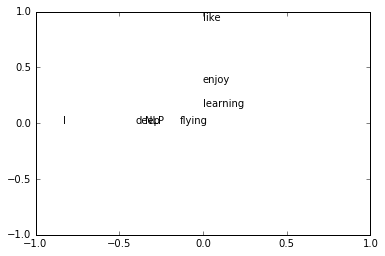

In [45]:
plt.ylim((-1,1))
plt.xlim((-1,1))
for i in xrange(len(unique_words_list)):
    plt.text(U[i,0], U[i,1], unique_words_list[i])